[Custom training] (https://www.tensorflow.org/tutorials/customization/custom_training)

In [13]:
import tensorflow as tf

from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
x = tf.zeros([10, 10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [4]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

In [5]:
v.assign(3.0)
assert v.numpy() == 3.0

In [7]:
v.assign(tf.square(v))
assert v.numpy() == 9.0

In [9]:
class Model():
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b

In [10]:
model = Model()
assert model(3.0).numpy() == 15.0

In [11]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

In [12]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000
inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

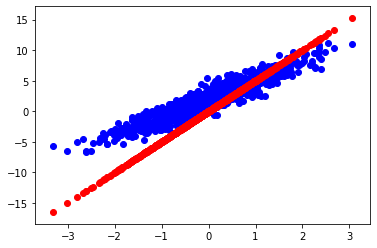

Current loss: 9.000021


In [15]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print(f"Current loss: {loss(model(inputs), outputs).numpy():1.6f}")

In [16]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [17]:
model = Model()

Epoch  0: W=5.00 b=0.00, loss=9.00002
Epoch  1: W=4.61 b=0.40, loss=6.17622
Epoch  2: W=4.30 b=0.72, loss=4.35701
Epoch  3: W=4.04 b=0.98, loss=3.18484
Epoch  4: W=3.84 b=1.19, loss=2.42948
Epoch  5: W=3.67 b=1.35, loss=1.94265
Epoch  6: W=3.54 b=1.48, loss=1.62885
Epoch  7: W=3.43 b=1.58, loss=1.42655
Epoch  8: W=3.35 b=1.67, loss=1.29611
Epoch  9: W=3.28 b=1.73, loss=1.21200


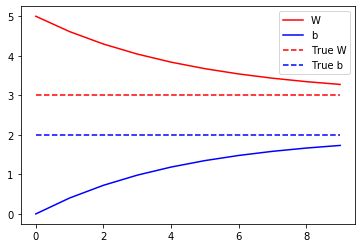

In [18]:
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print(f"Epoch {epoch:2}: W={Ws[-1]:1.2f} b={bs[-1]:1.2f}, loss={current_loss:2.5f}")

plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()